# Deep Learning Models

This notebooks gives a step by step explainer on how to build an artificial and convolution neural network using [keras](https://keras.io/about/) deep learning library on the MNIST dataset.

**MNIST Dataset**

The MNIST problem is a dataset developed by Yann LeCun, Corinna Cortes and Christopher Burges for evaluating machine learning models on the handwritten digit classification problem. The dataset was constructed from a number of scanned document dataset available from the National Institute of Standards and Technology (NIST). Images of digits were taken from a variety of scanned documents, normalized in size and centered. This makes it an excellent dataset for evaluating models, allowing the developer to focus on the machine learning with very little data cleaning or preparation required.

Each image is a 28 by 28 pixel square (784 pixels total). A standard split of the dataset is used to evaluate and compare models, where 60,000 images are used to train a model and a separate set of 10,000 images are used to test it.

## ANN Model

The following section shows how to build a bsic deep learning model with keras.

### I. Import Packages and Data

In [0]:
from keras.datasets import mnist
import os
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout
from keras.layers.convolutional import MaxPooling2D

In [0]:
# Load mnist data and split into train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data(path=os.getcwd()+'/mnist.npz')

In [0]:
# Check shape of data
print('MNIST Dataset Shape:')
print('x_train: ' + str(x_train.shape))
print('y_train: ' + str(y_train.shape))
print('x_test:  '  + str(x_test.shape))
print('y_test:  '  + str(y_test.shape))

MNIST Dataset Shape:
x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)

In [0]:
# Check unique count of digits in training dataset
unique, counts = np.unique(y_train, return_counts=True)
print ("Unique count of digits in train data:\n",np.asarray((unique, counts)).T)

Unique count of digits in train data:
 [[ 0 5923]
 [ 1 6742]
 [ 2 5958]
 [ 3 6131]
 [ 4 5842]
 [ 5 5421]
 [ 6 5918]
 [ 7 6265]
 [ 8 5851]
 [ 9 5949]]

In [0]:
# Check unique count of digits in test dataset
unique, counts = np.unique(y_test, return_counts=True)
print ("Unique count of digits in test data:\n",np.asarray((unique, counts)).T)

Unique count of digits in test data:
 [[ 0 980]
 [ 1 1135]
 [ 2 1032]
 [ 3 1010]
 [ 4 982]
 [ 5 892]
 [ 6 958]
 [ 7 1028]
 [ 8 974]
 [ 9 1009]]

### II. Normalize Data

<matplotlib.image.AxesImage at 0x7ff0ee7d0350>

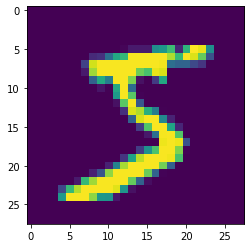

In [0]:
#plot the first image in the dataset
plt.imshow(x_train[0])

In [0]:
#check values
x_train[0]

array([[ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
 18, 18, 18, 126, 136, 175, 26, 166, 255, 247, 127, 0, 0,
 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 30, 36, 94, 154, 170,
 253, 253, 253, 253, 253, 225, 172, 253, 242, 195, 64, 0, 0,
 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 49, 238, 253, 253, 253, 253,
 253, 253, 253, 253, 251, 93, 82, 82, 56, 39, 0, 0, 0,
 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 18, 219, 253, 253, 253, 253,
 253, 198, 182, 247, 241, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 80, 156, 107, 253, 253,
 205, 11, 0, 43, 154, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 14, 1, 154, 253,
 90, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 139, 253,
 190, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 11, 190,
 253, 70, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 35,
 241, 225, 160, 108, 1, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 81, 240, 253, 253, 119, 25, 0, 0, 0, 0, 0, 0, 0,
 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 45, 186, 253, 253, 150, 27, 0, 0, 0, 0, 0, 0,
 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 16, 93, 252, 253, 187, 0, 0, 0, 0, 0, 0,
 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 249, 253, 249, 64, 0, 0, 0, 0, 0,
 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 46, 130, 183, 253, 253, 207, 2, 0, 0, 0, 0, 0,
 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 39,
 148, 229, 253, 253, 253, 250, 182, 0, 0, 0, 0, 0, 0,
 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 24, 114, 221,
 253, 253, 253, 253, 201, 78, 0, 0, 0, 0, 0, 0, 0,
 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 23, 66, 213, 253, 253,
 253, 253, 198, 81, 2, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0],
 [ 0, 0, 0, 0, 0, 0, 18, 171, 219, 253, 253, 253, 253,
 195, 80, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0],
 [ 0, 0, 0, 0, 55, 172, 226, 253, 253, 253, 253, 244, 133,
 11, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0],
 [ 0, 0, 0, 0, 136, 253, 253, 253, 212, 135, 132, 16, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0]], dtype=uint8)

Normalize - The pixel values are between 0 and 255. Scaling the data to range 0 and 1 in order to make it easier for the network to learn.

In [0]:
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)

<matplotlib.image.AxesImage at 0x7ff0eaa70890>

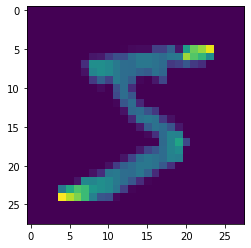

In [0]:
#plot the first image in the dataset
plt.imshow(x_train[0])

In [0]:
x_train[0]

array([[0. , 0. , 0. , 0. , 0. ,
 0. , 0. , 0. , 0. , 0. ,
 0. , 0. , 0. , 0. , 0. ,
 0. , 0. , 0. , 0. , 0. ,
 0. , 0. , 0. , 0. , 0. ,
 0. , 0. , 0. ],
 [0. , 0. , 0. , 0. , 0. ,
 0. , 0. , 0. , 0. , 0. ,
 0. , 0. , 0. , 0. , 0. ,
 0. , 0. , 0. , 0. , 0. ,
 0. , 0. , 0. , 0. , 0. ,
 0. , 0. , 0. ],
 [0. , 0. , 0. , 0. , 0. ,
 0. , 0. , 0. , 0. , 0. ,
 0. , 0. , 0. , 0. , 0. ,
 0. , 0. , 0. , 0. , 0. ,
 0. , 0. , 0. , 0. , 0. ,
 0. , 0. , 0. ],
 [0. , 0. , 0. , 0. , 0. ,
 0. , 0. , 0. , 0. , 0. ,
 0. , 0. , 0. , 0. , 0. ,
 0. , 0. , 0. , 0. , 0. ,
 0. , 0. , 0. , 0. , 0. ,
 0. , 0. , 0. ],
 [0. , 0. , 0. , 0. , 0. ,
 0. , 0. , 0. , 0. , 0. ,
 0. , 0. , 0. , 0. , 0. ,
 0. , 0. , 0. , 0. , 0. ,
 0. , 0. , 0. , 0. , 0. ,
 0. , 0. , 0. ],
 [0. , 0. , 0. , 0. , 0. ,
 0. , 0. , 0. , 0. , 0. ,
 0. , 0. , 0.00393124, 0.02332955, 0.02620568,
 0.02625207, 0.17420356, 0.17566281, 0.28629534, 0.05664824,
 0.51877786, 0.71632322, 0.77892406, 0.89301644, 0. ,
 0. , 0. , 0. ],
 [0. , 0. , 0. , 0. , 0. ,
 0. , 0. , 0. , 0.05780486, 0.06524513,
 0.16128198, 0.22713296, 0.22277047, 0.32790981, 0.36833534,
 0.3689874 , 0.34978968, 0.32678448, 0.368094 , 0.3747499 ,
 0.79066747, 0.67980478, 0.61494005, 0.45002403, 0. ,
 0. , 0. , 0. ],
 [0. , 0. , 0. , 0. , 0. ,
 0. , 0. , 0.12250613, 0.45858525, 0.45852825,
 0.43408872, 0.37314701, 0.33153488, 0.32790981, 0.36833534,
 0.3689874 , 0.34978968, 0.32420121, 0.15214552, 0.17865984,
 0.25626376, 0.1573102 , 0.12298801, 0. , 0. ,
 0. , 0. , 0. ],
 [0. , 0. , 0. , 0. , 0. ,
 0. , 0. , 0.04500225, 0.4219755 , 0.45852825,
 0.43408872, 0.37314701, 0.33153488, 0.32790981, 0.28826244,
 0.26543758, 0.34149427, 0.31128482, 0. , 0. ,
 0. , 0. , 0. , 0. , 0. ,
 0. , 0. , 0. ],
 [0. , 0. , 0. , 0. , 0. ,
 0. , 0. , 0. , 0.1541463 , 0.28272888,
 0.18358693, 0.37314701, 0.33153488, 0.26569767, 0.01601458,
 0. , 0.05945042, 0.19891229, 0. , 0. ,
 0. , 0. , 0. , 0. , 0. ,
 0. , 0. , 0. ],
 [0. , 0. , 0. , 0. , 0. ,
 0. , 0. , 0. , 0. , 0.0253731 ,
 0.00171577, 0.22713296, 0.33153488, 0.11664776, 0. ,
 0. , 0. , 0. , 0. , 0. ,
 0. , 0. , 0. , 0. , 0. ,
 0. , 0. , 0. ],
 [0. , 0. , 0. , 0. , 0. ,
 0. , 0. , 0. , 0. , 0. ,
 0. , 0.20500962, 0.33153488, 0.24625638, 0.00291174,
 0. , 0. , 0. , 0. , 0. ,
 0. , 0. , 0. , 0. , 0. ,
 0. , 0. , 0. ],
 [0. , 0. , 0. , 0. , 0. ,
 0. , 0. , 0. , 0. , 0. ,
 0. , 0.01622378, 0.24897876, 0.32790981, 0.10191096,
 0. , 0. , 0. , 0. , 0. ,
 0. , 0. , 0. , 0. , 0. ,
 0. , 0. , 0. ],
 [0. , 0. , 0. , 0. , 0. ,
 0. , 0. , 0. , 0. , 0. ,
 0. , 0. , 0.04586451, 0.31235677, 0.32757096,
 0.23335172, 0.14931733, 0.00129164, 0. , 0. ,
 0. , 0. , 0. , 0. , 0. ,
 0. , 0. , 0. ],
 [0. , 0. , 0. , 0. , 0. ,
 0. , 0. , 0. , 0. , 0. ,
 0. , 0. , 0. , 0.10498298, 0.34940902,
 0.3689874 , 0.34978968, 0.15370495, 0.04089933, 0. ,
 0. , 0. , 0. , 0. , 0. ,
 0. , 0. , 0. ],
 [0. , 0. , 0. , 0. , 0. ,
 0. , 0. , 0. , 0. , 0. ,
 0. , 0. , 0. , 0. , 0.06551419,
 0.27127137, 0.34978968, 0.32678448, 0.245396 , 0.05882702,
 0. , 0. , 0. , 0. , 0. ,
 0. , 0. , 0. ],
 [0. , 0. , 0. , 0. , 0. ,
 0. , 0. , 0. , 0. , 0. ,
 0. , 0. , 0. , 0. , 0. ,
 0.02333517, 0.12857881, 0.32549285, 0.41390126, 0.40743158,
 0. , 0. , 0. , 0. , 0. ,
 0. , 0. , 0. ],
 [0. , 0. , 0. , 0. , 0. ,
 0. , 0. , 0. , 0. , 0. ,
 0. , 0. , 0. , 0. , 0. ,
 0. , 0. , 0.32161793, 0.41390126, 0.54251585,
 0.20001074, 0. , 0. , 0. , 0. ,
 0. , 0. , 0. ],
 [0. , 0. , 0. , 0. , 0. ,
 0. , 0. , 0. , 0. , 0. ,
 0. , 0. , 0. , 0. , 0.06697006,
 0.18959827, 0.25300993, 0.32678448, 0.41390126, 0.45100715,
 0.00625034, 0. , 0. , 0. , 0. ,
 0. , 0. , 0. ],
 [0. , 0. , 0. , 0. , 0. ,
 0. , 0. , 0. , 0. , 0. ,
 0. , 0. , 0.05110617, 0.19182076, 0.33339444,
 0.3689874 , 0.34978968, 0.32678448, 0.40899334, 0.39653769,
 0. , 0. , 0. , 0. , 0. ,
 0. , 0. , 0. ],
 [0. , 0. , 0. , 0. , 0. ,
 0. , 0. , 0. , 0. , 0. ,
 0.04117838, 0.16813739, 0.28960162, 0.32790981, 0.36833534,
 0.3689874 , 0.34978968, 0.25961929, 0.12760592, 0. ,
 0. , 0. , 0. , 0. , 0. ,
 0. , 0. 

### III. Build an ANN Model

Before building a deep learning model, lets look at the individual layers to used in the model and their purpose

**Flatten Layer**

Flattens the input. This layer converts the data into a 1-dimensional array.

In [0]:
# Create a `Sequential` model and add a Flatten layer as the first layer. 
# Convert a 3x2 input into a 1-dimensional array of length 6
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(3,2)))
model.output_shape

(None, 6)

**Dense Layer**

Dense class from keras is an implementation of the simplest neural network building block: the fully connected layer. In technical terms, dense layer is the implementation of the equation `output = activation(dot(input, kernel) + bias)`. This means that we take the dot product between our input tensor and whatever the weight kernel matrix is featured in our dense layer. Then, we add a bias vector (optional, if required) and take an element-wise activation of the output values (some function, linear or in most cases non-linear).

*Activation function*

An activation function is a function that is added into an artificial neural network in order to help the network learn complex patterns in the data. It takes in the output signal from the previous cell and converts it into some form that can be taken as input to the next cell.

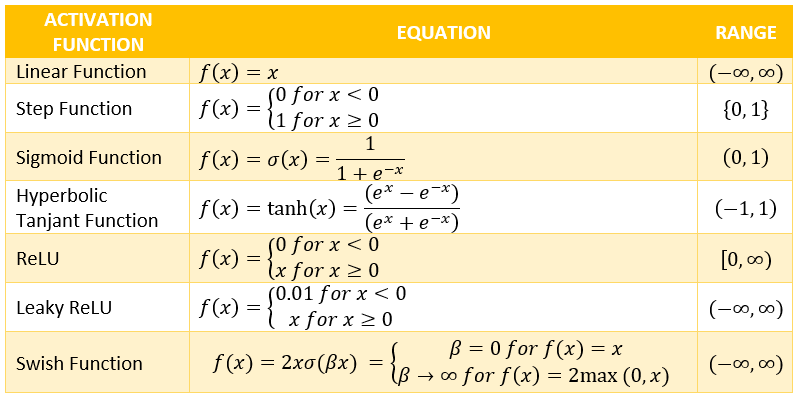

In [0]:
# Create a `Sequential` model and add a Dense layer as the first layer
model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(16,)))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.output_shape

(None, 128)

**Dropout Layer**

A fully connected layer occupies most of the parameters, and hence, neurons develop co-dependency amongst each other during training which curbs the individual power of each neuron leading to over-fitting of training data.

Hence, a [Dropout Layer](https://towardsdatascience.com/machine-learning-part-20-dropout-keras-layers-explained-8c9f6dc4c9ab?gi=e79b5385b6ad) layer is added to avoid overfitting. In passing 0.5, every hidden unit (neuron) is set to 0 with a probability of 0.5. In other words, there’s a 50% chance that the output of a given neuron will be forced to 0.

**Complete ANN Model**

Now, we build a complete deep learning model. We will be using a `Sequential` model which is the easiest way to build a  model in keras for a plain stack of layers. We use the `add()`function to add layers to the model.

- Flatten Layer
    - This layer converts the data into a 1-dimensional array for inputting it to the next layer.
- Dense Layer
    - Two dense layers with 128 nodes and `relu` activation function
    - One dense layer with 128 nodes and `softmax` activation function. This activation function is used to turn the outputs into probability-like values

In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(Dropout(0.5))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.softmax))

Next, the model is compiled with the categorical cross entropy loss function and the efficient ADAM gradient descent algorithm is used to learn the weights.

In [0]:
# Complie the model
model.compile(optimizer= 'adam'
             ,loss= 'sparse_categorical_crossentropy'
             ,metrics= ['accuracy'])
model.fit(x_train,y_train,epochs=3)

Epoch 1/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8530 - accuracy: 0.7639
Epoch 2/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2389 - accuracy: 0.9278
Epoch 3/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1910 - accuracy: 0.9416

<tensorflow.python.keras.callbacks.History at 0x7ff0eb860d50>

In [0]:
# Print model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type) Output Shape Param # 
=================================================================
flatten_1 (Flatten) (32, 784) 0 
_________________________________________________________________
dense_1 (Dense) (32, 128) 100480 
_________________________________________________________________
dropout (Dropout) (32, 128) 0 
_________________________________________________________________
dense_2 (Dense) (32, 128) 16512 
_________________________________________________________________
dense_3 (Dense) (32, 128) 16512 
=================================================================
Total params: 133,504
Trainable params: 133,504
Non-trainable params: 0
_________________________________________________________________

Evaluate the model

In [0]:
# Evaluate the model
val_loss, val_acc = model.evaluate(x_test,y_test)
print("ANN Model evaluation \n",
      f"Validation Loss: {val_loss}\n",
      f"Validation Accuracy: {val_acc}")

313/313 [==============================] - 0s 1ms/step - loss: 0.1227 - accuracy: 0.9637
ANN Model evaluation 
 Validation Loss: 0.1226649284362793
 Validation Accuracy: 0.963699996471405

Prediction

In [0]:
# Save the model
model.save("num_reader_model")

INFO:tensorflow:Assets written to: num_reader_model/assets

In [0]:
# Load the model
new_model = tf.keras.models.load_model('num_reader_model')

Predict on the test dataset

In [0]:
pred_ann = new_model.predict(x_test)

In [0]:
pred_ann

array([[1.09600435e-07, 4.80016773e-08, 1.32415429e-04, ...,
 4.98283873e-17, 3.62230364e-17, 4.11517871e-15],
 [5.44212186e-09, 9.42260143e-04, 9.99014139e-01, ...,
 2.35862228e-19, 5.38634993e-19, 2.24606966e-17],
 [4.43565362e-08, 9.99673605e-01, 1.10103021e-04, ...,
 3.37302720e-11, 7.25678415e-12, 6.28691404e-11],
 ...,
 [6.51376979e-08, 3.81162454e-06, 7.16286513e-06, ...,
 9.49035728e-12, 1.49610359e-12, 6.89245406e-12],
 [1.79344880e-07, 6.98186568e-07, 2.00711995e-07, ...,
 2.96661304e-15, 2.48156328e-16, 2.64559518e-15],
 [3.22848155e-06, 6.19855367e-09, 4.44860007e-06, ...,
 4.72973669e-16, 1.49339670e-15, 8.03521606e-16]], dtype=float32)

Use argmax function to select the index of an array that results in the largest value.

In [0]:
print(np.argmax(pred_ann[0]))

7

<matplotlib.image.AxesImage at 0x7ff0eb7e56d0>

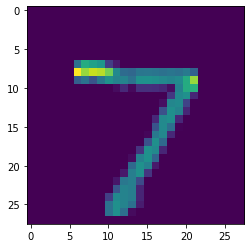

In [0]:
plt.imshow(x_test[0])

### Basic CNN Model

The following section shows a step by step detail on how to a create simple convolutional neural network with keras library.

In [0]:
# Load mnist data and split into train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data(path=os.getcwd()+'/mnist.npz')

In [0]:
# Check shape of data
print('MNIST Dataset Shape:')
print('x_train: ' + str(x_train.shape))
print('y_train: ' + str(y_train.shape))
print('x_test:  '  + str(x_test.shape))
print('y_test:  '  + str(y_test.shape))

MNIST Dataset Shape:
x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)

<matplotlib.image.AxesImage at 0x7ff0f5a07210>

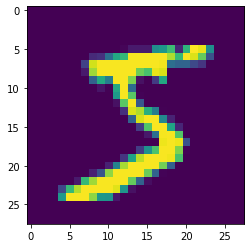

In [0]:
#plot the first image in the dataset
plt.imshow(x_train[0])

In the case of MNIST where the pixel values are gray scale, the pixel dimension is set to 1.

In [0]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')

<matplotlib.image.AxesImage at 0x7ff0eb6bdc50>

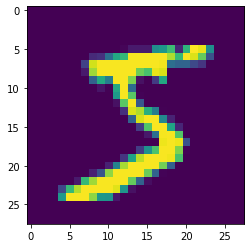

In [0]:
#plot the first image in the dataset
plt.imshow(x_train[0])

Normalize the pixel values to the range 0 and 1 and one hot encode the output variables.

In [0]:
# Normalize train and test data
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)

In [0]:
# One hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [0]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
 [0., 0., 1., ..., 0., 0., 0.],
 [0., 1., 0., ..., 0., 0., 0.],
 ...,
 [0., 0., 0., ..., 0., 0., 0.],
 [0., 0., 0., ..., 0., 0., 0.],
 [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### IV. Build a CNN Model

Before building a deep learning model, lets look at the individual layers to used in the model and their purpose

**Conv2D layer**

The fundamental difference between a densely connected layer and a specialized layer in the convolution operation, which we will call the convolutional layer, is that the dense layer learns global patterns in its global input space, while the convolutional layers learn local patterns in small windows of two dimensions. In an intuitive way, we could say that the main purpose of a convolutional layer is to detect features or visual features in images such as edges, lines, color drops, etc. This is a very interesting property because, once it has learned a characteristic at a specific point in the image, it can recognize it later in any part of it. Instead, in a densely connected neural network it has to learn the pattern again if it appears in a new location of the image.

Keras `Conv2D` is a 2D Convolution Layer, this layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs.

**Pooling Layer**

Convolutional neural networks accompany the convolution layer with pooling layers, which are usually applied immediately after the convolutional layers. The pooling layers simplify the information collected by the convolutional layer and create a condensed version of the information contained in them. In technical terms, pooling layers reduce the dimension of the feature maps. Thus, it reduces the number of parameters to learn and the amount of computation performed in the network.

As mentioned above, the result of using a pooling layer is a summarized version of the features detected in the input. So, further operations are performed on summarised features instead of precisely positioned features generated by the convolution layer. This makes the model more robust to variations in the position of the features in the input image.

**Complete CNN model**

1. The first hidden layer is a convolutional layer called a `Convolution2D`. The layer has 32 feature maps, which with a 3x3 kernel and a rectifier activation function
2. Next we define a pooling layer `MaxPooling2D` layer that takes the max, configured with a pool size of 2×2.
3. `Dropout` layer configured to randomly exclude 20% of neurons in the layer in order to reduce overfitting
4. Next is the `Flatten` layer (same as used before in ANN model) that converts the 2D matrix data to a vector. It allows the output to be processed by standard fully connected layers.
5. Next a fully connected layer with 128 neurons and rectifier activation function.
6. Finally, the output layer has 10 neurons for the 10 classes and a `softmax` activation function to output probability-like predictions for each class.

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=3, input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

As before, the model is trained using logarithmic loss and the ADAM gradient descent algorithm.

In [0]:
# Compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
# Train the model
history = model.fit(x_train, y_train,validation_data=(x_test, y_test), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3843 - accuracy: 0.8875 - val_loss: 0.0766 - val_accuracy: 0.9768
Epoch 2/3
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0782 - accuracy: 0.9766 - val_loss: 0.0630 - val_accuracy: 0.9813
Epoch 3/3
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0501 - accuracy: 0.9846 - val_loss: 0.0531 - val_accuracy: 0.9831

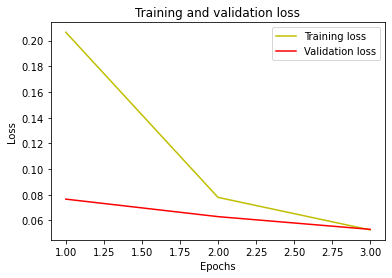

In [0]:
# Plot training and validation loss over epochs
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
# Print model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type) Output Shape Param # 
=================================================================
conv2d (Conv2D) (None, 26, 26, 32) 320 
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32) 0 
_________________________________________________________________
dropout_1 (Dropout) (None, 13, 13, 32) 0 
_________________________________________________________________
flatten_2 (Flatten) (None, 5408) 0 
_________________________________________________________________
dense_4 (Dense) (None, 128) 692352 
_________________________________________________________________
dense_5 (Dense) (None, 10) 1290 
=================================================================
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________

Evaluate the CNN model

In [0]:
# Evaluate the model
val_loss, val_acc = model.evaluate(x_test,y_test,verbose=0)
print("CNN Model evaluation \n",
      f"Validation Loss: {val_loss}\n",
      f"Validation Accuracy: {val_acc}")

CNN Model evaluation 
 Validation Loss: 0.05312395095825195
 Validation Accuracy: 0.9830999970436096

Predict on the test dataset

In [0]:
pred_cnn = model.predict(x_test)

Use argmax function to select the index of an array that results in the largest value.

In [0]:
print(np.argmax(pred_cnn[0]))

7

<matplotlib.image.AxesImage at 0x7ff0d2f202d0>

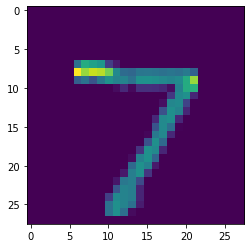

In [0]:
plt.imshow(x_test[0])